## Description

### Hyperparameter Tuning (Bayesian Optimization)

A hyperparameter is a parameter that can be set in order to define any configurable part of a model's learning process. For this CNN, the architecture hyperparameters we optimize are:
- The number and structure of Conv1D layers.
- Filter sizes, kernel sizes, and strides.
- Max-pooling sizes and activation functions for each layer.
- The size of the dense layer.
- The learning rate for optimization.

### Architecture

Model chnages: higher TX/expression is now higher prediction.

This version optimizes the process of training/testing and uses hyperparameter tuning. It uses a similar architecture to CNN_5_0. It does not include augmented data, just takes the data from La Fleur's supplemental materials including:
- La Fleur et al (and De Novo Designs)
- Urtecho et al
- Hossain et al
- Yu et al
- Lagator (36N, Pl, and Pr)
- Anderson Series

We onehot encode each basepair and pad the whole sequence. Because we use a CNN which is designed to identify "features," the input promoter can be any length (with padding) and the model will be able to accurately predict the expression.

In [2]:
from CNN_6_1 import *

In [3]:
# Documentation variables
name = 'CNN_6_1'
model_path = f'../Models/{name}.keras'
data_dir = '../Data/Train Test/'
search_dir = '../Testing CNN/Hyperparameter Search'

# Hyperparameter tuning variables
max_trials = 30

# Unoptimized training Hyperparameters
loss = 'mean_squared_error'
epochs = 100
batch_size = 32

# Hyperparameter ranges dictionary
hyperparam_ranges = {
    'num_layers': (1, 3),
    'filters': [32, 64, 128],
    'kernel_size': [3, 4, 5],
    'strides': [1, 2],
    'pool_size': [2, 3],
    'activation': ['relu', 'tanh'],
    'dense_units': (32, 128, 32),
    'learning_rate': (1e-4, 1e-2)
}

# Load train and test data
X_train, y_train = load_features(f'{data_dir}train_data.csv')
X_test, y_test = load_features(f'{data_dir}test_data.csv')

In [4]:
# # Perform Bayesian Optimization
# best_model = train_best_model(name, search_dir, X_train, y_train, X_test, y_test,
#                                 X_train.shape[1:], loss, max_trials, epochs, batch_size, hyperparam_ranges)

# # Save the best model
# best_model.save(model_path)

In [5]:
# Load, predict, and evaluate the best model
y_pred = load_and_predict(model_path, X_test)
mse, rmse, mae, r2 = calc_metrics(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)

  1/305 ━━━━━━━━━━━━━━━━━━━━ 45s 150ms/step

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MSE:  0.0023633085608818203
RMSE:  0.04861387210335976
MAE:  0.031483480426473164
R2:  0.8747818676902609


  1/305 ━━━━━━━━━━━━━━━━━━━━ 36s 119ms/step

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


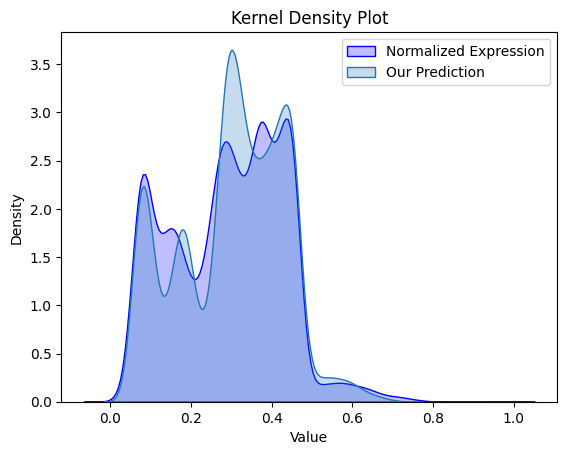

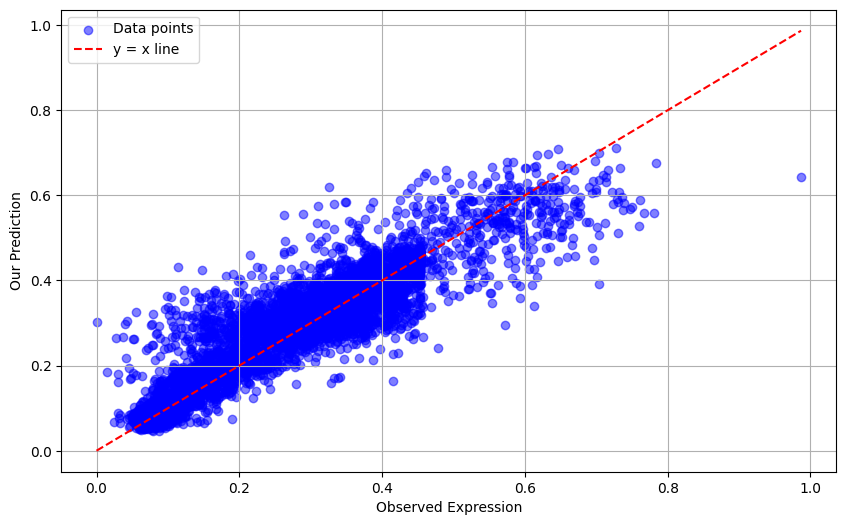

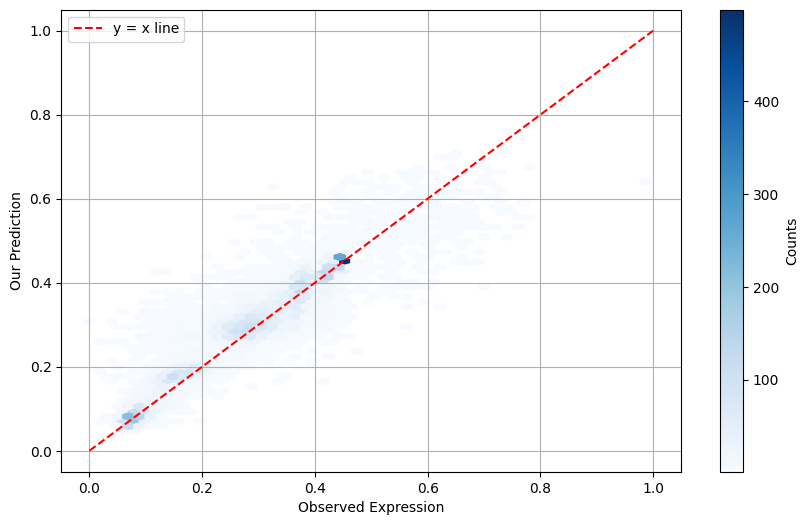

In [6]:
df = pd.read_csv(f'{data_dir}test_data.csv')

predicted = load_and_predict(model_path, X_test)
observed = df['Normalized Expression'].values

plot_kde(df, predicted)
plot_scatter(observed, np.ravel(predicted))
plot_hexbin(observed, np.ravel(predicted))